# Problem Situation 2

We're supposed to get the surface of an irregular shape.
Let's do this as a demo.

In [1]:
import numpy as np
from scipy import integrate as sp
import pandas as pd
from matplotlib import pyplot as plt

Using Google Earth, I marked 28 points to serve as the perimeter of **Little Barrier Island**, which is off the northeastern coast of Auckland, in New Zealand.

After that, I used a calculator to convert between Latitude and Longitude coordinates to UTM and saved them in a _Comma Separated Value_ file:

In [2]:
mypoints = pd.read_csv('sp02.csv')
# Let's convert to km instead of meters
mypoints.X = mypoints.X / 1000
mypoints.Y = mypoints.Y / 1000
mypoints

,Name,Latitude,Longitude,X,Y
0,ap1,-36.185623,175.053812,324.9964,5993.7077
1,ap2,-36.184442,175.070002,326.4498,5993.8679
2,ap3b,-36.179474,175.067500,326.2138,5994.4145
3,bp2c,-36.179389,175.075166,326.9031,5994.4377
4,cp2,-36.176160,175.086673,327.9309,5994.8163
5,cp3d,-36.173054,175.083195,327.6113,5995.1547
6,dp2,-36.168663,175.090350,328.2453,5995.6545
7,dp3e,-36.166966,175.089993,328.2095,5995.8422
8,ep2f,-36.167572,175.100624,329.1670,5995.7937
9,fp2,-36.170527,175.101336,329.2375,5995.4671


Get X and Y coordinates, and append the first one again to close the loop in the plot

In [3]:
x = mypoints.X.values
y = mypoints.Y.values

x = np.append(x, x[0])
y = np.append(y, y[0])

Let's plot it and see more or less what the points show

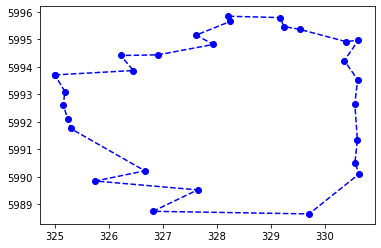

In [4]:
plt.plot(x,y, 'ob--')

We need to normalise the plots so that it all occurs on the first quadrant of the Cartesian plane, so let's substract the minimum $x$ and $y$ to ALL points

In [5]:
y = y - np.amin(y)
x = x - np.amin(x)

If we plot again, we should get the same shape, but positioned at $(0,0)$

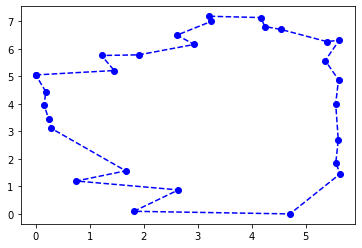

In [6]:
plt.plot(x,y, 'ob--')

There's 2 possible ways to carry on: using `np.polyfit`, or using a built-in function. Let's go with the built-in first.

## The segmentation method

In my case, I have declared 14 segments, as shown:

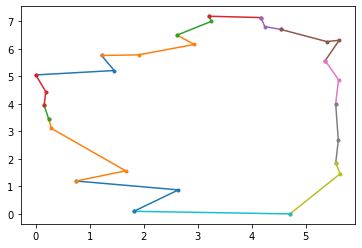

In [7]:
plt.plot(x[0:3], y[0:3],'.-') # 0:3, 2
plt.plot(x[2:6], y[2:6],'.-') # 2:6, 2
plt.plot(x[5:8], y[5:8],'.-') # 5:8, 2
plt.plot(x[7:9], y[7:9],'.-') # 7:9, 1
plt.plot(x[8:11], y[8:11],'.-') # 8:11, 2
plt.plot(x[10:14], y[10:14],'.-') # 10:14, 2
plt.plot(x[13:16], y[13:16],'.-') # 13:16, 2
plt.plot(x[15:18], y[15:18],'.-') # 15:18, 1
plt.plot(x[17:20], y[17:20],'.-') # 17:20, 2
plt.plot(x[19:21], y[19:21],'.-') # 19:21, 1
plt.plot(x[20:23], y[20:23],'.-') # 20:23, 2
plt.plot(x[22:26], y[22:26],'.-') # 22:26, 2
plt.plot(x[25:27], y[25:27],'.-') # 25:27, 1
plt.plot(x[26:29], y[26:29],'.-') # 26:29, 2

So we need to obtain the integral of each of those segments.
For that, I'm using the `integrate` module in the `scipy` Python package.
Especifically, the `trapz` function allows us to pass a list of $y$ coordinates, a list of $x$ coordinates and that's it.

I am calculating them all 'at once' in this cell, and saving them in the `ints` list

In [8]:
ints = []
ints.append(sp.trapz(y[0:3], x[0:3], axis=0)) # 0:3, 2
ints.append(sp.trapz(y[2:6], x[2:6], axis=0)) # 2:6, 2
ints.append(sp.trapz(y[5:8], x[5:8], axis=0)) # 5:8, 2
ints.append(sp.trapz(y[7:9], x[7:9], axis=0)) # 7:9, 1
ints.append(sp.trapz(y[8:11], x[8:11], axis=0)) # 8:11, 2
ints.append(sp.trapz(y[10:14], x[10:14], axis=0)) # 10:14, 2
ints.append(sp.trapz(y[13:16], x[13:16], axis=0)) # 13:16, 2
ints.append(sp.trapz(y[15:18], x[15:18], axis=0)) # 15:18, 1
ints.append(sp.trapz(y[17:20], x[17:20], axis=0)) # 17:20, 2
ints.append(sp.trapz(y[19:21], x[19:21], axis=0)) # 19:21, 1
ints.append(sp.trapz(y[20:23], x[20:23], axis=0)) # 20:23, 2
ints.append(sp.trapz(y[22:26], x[22:26], axis=0)) # 22:26, 2
ints.append(sp.trapz(y[25:27], x[25:27], axis=0)) # 25:27, 1
ints.append(sp.trapz(y[26:29], x[26:29], axis=0)) # 26:-1, 2
ints

[6.1689205199997295,
 8.097005529999919,
 4.027099070000017,
 6.861397124999933,
 2.484577949999919,
 5.447532715000417,
 1.0574252999998879,
 0.054112530000184705,
 -0.5435388250002817,
 -0.137718029999933,
 -1.5586241300007435,
 -2.110848859999655,
 -0.31776140000008285,
 -0.7526130149998437]

If I sum all the integrals (including the negative ones) then I'll have the area between those segments:

In [9]:
np.sum(ints)

28.776966479999462

## The `polyfit` approach

The other approach is to get the functions of the segments, and then integrate them and such.

We start with the _upper_ part, which is a unique segment of 16 points, joint using a function of degree 4:

In [10]:
np.polyfit(x[0:16], y[0:16], 4)

array([-2.86929328e-03, -5.51261208e-02,  4.39308625e-01, -2.08899401e-01,
        5.08813953e+00])

I'll program the function and we end up with the following:

In [11]:
def f(x):
    return -2.86929328e-03 * x ** 4 -5.51261208e-02 * x ** 3 + 4.39308625e-01 * x ** 2  -2.08899401e-01 * x + 5.08813953e+00

Let's see how it looks like

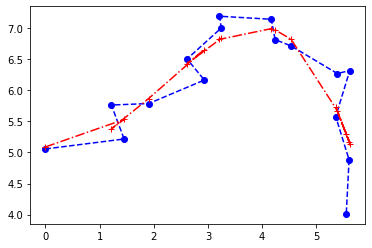

In [12]:
plt.plot(x[0:16], y[0:16], 'ob--')
plt.plot(x[0:16], f(x[0:16]), 'r+-.')

Which is a decent approximation. Let's continue with the _lower_ part, which is another segment of 14 points, joint using a 4-th degree function

In [13]:
np.polyfit(x[15:29], y[15:29], 4)

array([ 0.09866816, -1.15196135,  4.63933129, -7.64963703,  5.13160799])

In [14]:
def f2(x):
     return 0.09866816 * x ** 4 -1.15196135 * x ** 3 +  4.63933129 * x ** 2 -7.64963703 * x + 5.13160799

which looks like this...

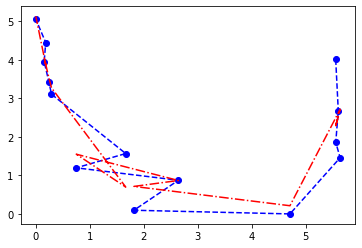

In [15]:
plt.plot(x[15:29],y[15:29], 'ob--')
plt.plot(x[15:29], f2(x[15:29]), 'r-.')

We can now proceed to obtain the integral of the upper part `f`, and substract the integral of the lower part `f2`.
For this I'm using another `scipy`'s `integrate` function called `quad`. It needs a function (`f`, for example) and then points $a$ and $b$, which in this case is the leftmost and the rightmost $x$-coordinate in our data.

In [16]:
I1 = sp.quad(f, np.amin(x), np.amax(x))
print(I1)
I2 = sp.quad(f2, np.amin(x), np.amax(x))
print(I2)

(34.41263586487607, 3.8205700675226855e-13)
(5.9239037154861185, 6.576854300595201e-14)


The two numbers per _answer_ are first the value of the integral and then the error. As you can see the error is quite small, so we're good.

We just need to substract the _lower_ part from the _upper_ part and we're done:

In [17]:
I = I1[0] - I2[0]
I

28.488732149389953

## Summary

In [18]:
segment_result = np.sum(ints)
polyfit_result = I
print(f'Surface according to the segments method is {segment_result}')
print(f'Surface according to the polyfit method is {polyfit_result}')
print('Real surface according to Wikipedia: 28.17 km²')

Surface according to the segments method is 28.776966479999462
Surface according to the polyfit method is 28.488732149389953
Real surface according to Wikipedia: 28.17 km²
